 23%|██▎       | 23/100 [00:00<00:00, 222.41it/s]

(30, 24)



 23%|██▎       | 23/100 [00:00<00:00, 226.37it/s]

('cel', (100, 30, 24))



 22%|██▏       | 22/100 [00:00<00:00, 216.73it/s]

('cla', (100, 30, 24))



 15%|█▌        | 15/100 [00:00<00:00, 148.30it/s]

('flu', (100, 30, 24))



 13%|█▎        | 13/100 [00:00<00:00, 124.51it/s]

('gac', (100, 30, 24))



 14%|█▍        | 14/100 [00:00<00:00, 139.69it/s]

('gel', (100, 30, 24))



 17%|█▋        | 17/100 [00:00<00:00, 164.08it/s]

('org', (100, 30, 24))



 22%|██▏       | 22/100 [00:00<00:00, 215.17it/s]

('pia', (100, 30, 24))



 21%|██        | 21/100 [00:00<00:00, 206.49it/s]

('sax', (100, 30, 24))



 22%|██▏       | 22/100 [00:00<00:00, 216.13it/s]

('tru', (100, 30, 24))



 18%|█▊        | 18/100 [00:00<00:00, 176.94it/s]

('vio', (100, 30, 24))



100%|██████████| 11/11 [00:06<00:00,  1.83it/s]


('voi', (100, 30, 24))


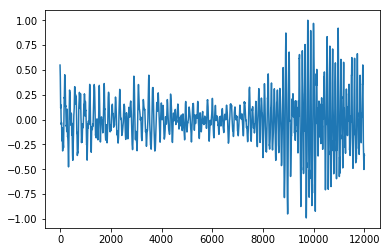

In [8]:
# This notebook converts audio samples .npy in diretory ./sample_data into MFCC features located in ./sample_features.
# Output dimensions per file is (30,24)
from os.path import join
from matplotlib import pyplot as plt
from skimage.measure import block_reduce
from multiprocessing import Pool
import numpy as np
import librosa
from tqdm import tqdm

from utils import FEATURE_DIR, CLASSNAMES, SAMPLE_DIR

data_root = SAMPLE_DIR

samples = {}
for d in CLASSNAMES:
    samples[d] = np.load(join(data_root, d+'_samples.npy'))

# Sanity test:
pia = samples["pia"]
sax = samples["sax"]
plt.plot(sax[10])

test_sax = sax[10]
test_sax_mfcc = librosa.feature.mfcc(test_sax,n_mfcc=30,sr=48000)
print(test_sax_mfcc.shape)

for classname in tqdm(CLASSNAMES):
    class_samples = samples[classname] 
    samples_mfcc = []
    (num_samples, sample_length) = class_samples.shape # e.g samples.shape=(672,12000)
    for i in tqdm(range(num_samples)):
        sample = class_samples[i]
        sample_mfcc = librosa.feature.mfcc(sample,n_mfcc=30,sr=48000)
        samples_mfcc.append(sample_mfcc)
    samples_mfcc = np.asarray(samples_mfcc)
    print (classname, samples_mfcc.shape)
    file_path = join(FEATURE_DIR, classname + '_mfcc.npy')
    with open(file_path, 'w+') as f:
        np.save(f, samples_mfcc)
